In [2]:
import numpy as np
import pyaudio
import wave
import matplotlib.pyplot as plt

In [3]:
class AudioFile:
    fs = 44100
    T = 1/fs

    def __init__(self, file):
        """ Init audio stream """ 
        self.wf = wave.open(file, 'rb')
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(
            format = self.p.get_format_from_width(self.wf.getsampwidth()),
            channels = self.wf.getnchannels(),
            rate = self.wf.getframerate(),
            output = True
        )
        self.chunk = self.wf.getnframes()

    def setChunk(self, chunk):
        self.chunk = chunk
    def play(self):
        """ Play entire file """
        data = self.wf.readframes(self.chunk)
        while data != '':
            self.stream.write(data)
            data = self.wf.readframes(self.chunk)

    def close(self):
        """ Graceful shutdown """ 
        self.stream.close()
        self.p.terminate()

In [4]:
F1 = "../../files/sample_songs/SongOneCutted.wav"
F2 = "../../files/sample_songs/SongTwoCutted.wav"

In [5]:
a = AudioFile(F1)
b = AudioFile(F2)

In [6]:
data = a.wf.readframes(a.chunk)
_wav = np.frombuffer(data, dtype=np.int16)
wav = _wav

In [7]:
wfft = np.fft.fft(wav)
rwfft = np.abs(wfft) ** 2
dt = a.fs / (a.chunk * 2)
N = a.chunk*2
t = np.linspace(0, a.fs - a.fs/N, N) 
ti = np.arange(N)

In [8]:
a.stream.write(data)

In [9]:
data2 = b.wf.readframes(b.chunk)
_wav2 = np.frombuffer(data2, dtype=np.int16)
wav2 = _wav2

In [10]:
b.stream.write(data2)

In [13]:
w = int(44100  /2)
c = (_wav2[:w] / 2) * 0.3 + (_wav[:w] / 2) * 0.7
mix0 = c.astype(np.int16).tostring()

c1 = (_wav2[:w] / 2) * 0.6 + (_wav[:w] / 2) * 0.4
mix1 = c1.astype(np.int16).tostring()

mix = np.vstack([c, c1]) / 0x7fff

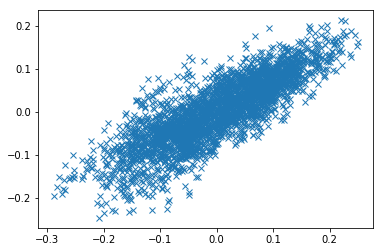

In [15]:
pw = 3000
plt.plot(mix[0,:pw],mix[1,:pw],'x')

In [79]:
plt.show()

In [16]:
sq = np.zeros((2,1))
sq[:,0] = np.sum(mix * mix,1)
amp = sq * mix

In [17]:
mix = np.dot(amp.T, amp)

In [18]:
res = np.linalg.inv(mix)

array([[2851.10309379],
       [2251.44110138]])

In [71]:
-0.02056642 * 2251.44110138

-46.304083296243654

In [26]:
a = np.linalg.inv

AttributeError: 'bytes' object has no attribute 'dtype'

In [20]:
_wav2[0]/2 + _wav[:w]/2

array([-1530. , -3487. , -1877.5, ...,  -309.5,  -309.5,  -309.5])

In [27]:
b.stream.write(cc)

<IPython.core.display.Javascript object>


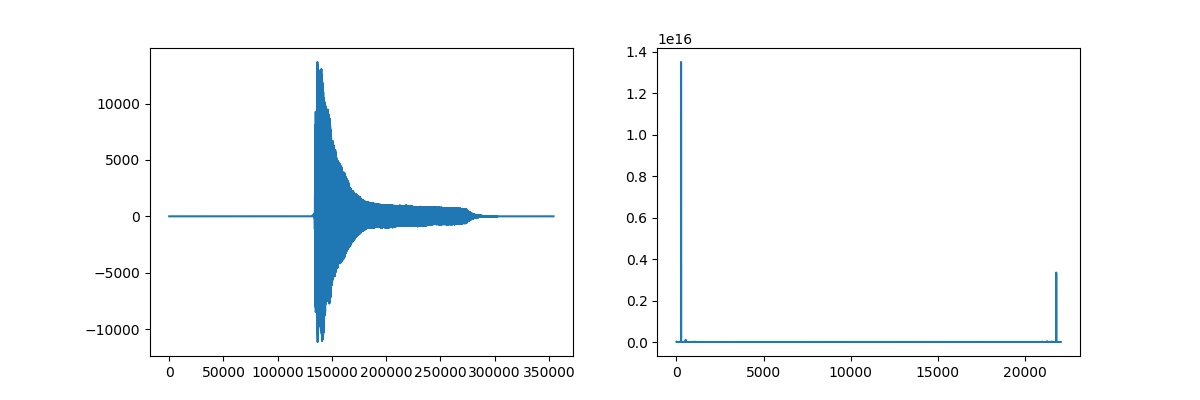

In [158]:
%matplotlib notebook
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,2)
plt.plot(t[:N//2], rwfft[:N//2])
plt.subplot(1,2,1)
plt.plot(ti, wav)

plt.show()

In [66]:
swav.shape

(30000,)

In [159]:
st = 170000
sp = 170500
N = sp - st
swav = wav[st:sp]
wfft = np.fft.fft(swav)
rwfft = np.abs(wfft)
dt = a.fs / (N)
t = np.linspace(0, a.fs - a.fs/N, N) 
ti = np.arange(N)

<IPython.core.display.Javascript object>


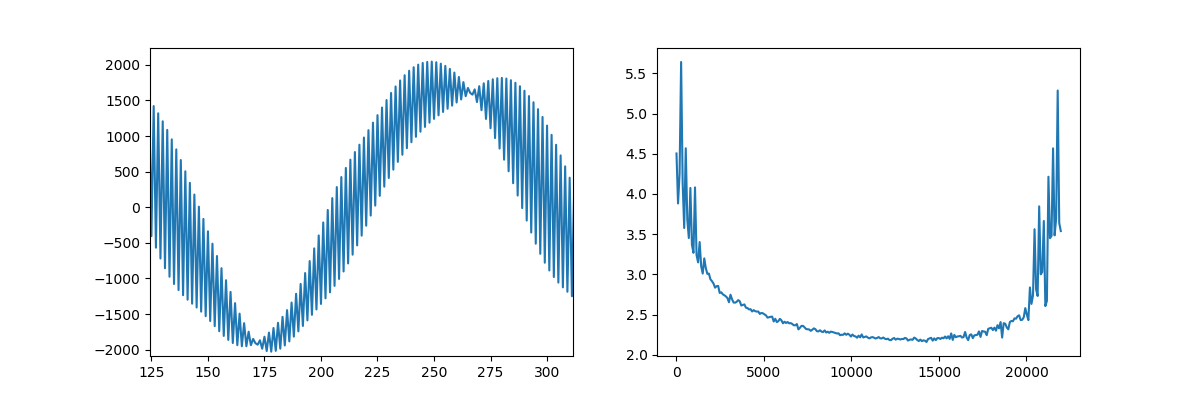

In [160]:
%matplotlib notebook
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,2)
plt.plot(t[:N//2], np.log10(rwfft[:N//2]))
plt.subplot(1,2,1)
plt.plot(ti, swav)

plt.show()

In [113]:
n = 1 * 44100
a_sn = int((np.pi/4 / 2 / (2 * np.pi)) * (np.pi / n / 2))
a_sn2 = int((np.pi / 2 / (2 * np.pi)) * (np.pi / n / 2))
a = np.cos(np.arange(n) * np.pi / n / 2) * 0.8
a_ = np.cos(np.arange(a_sn,n+a_sn) * np.pi / n / 2) * 1
a__ = np.cos(np.arange(a_sn2,n+a_sn2) * np.pi / n / 2) * 1
a *= a_# * a__)
a *= a__

<IPython.core.display.Javascript object>


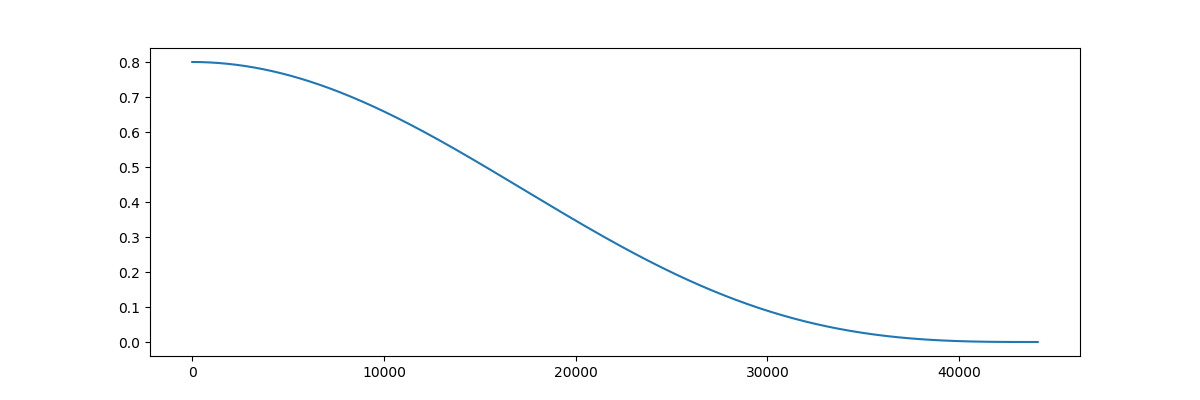

In [114]:
%matplotlib notebook
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(a)
plt.show()

In [191]:
def piano(frequency, t, sampleRate,shift=np.pi/4):
    n = int(t * sampleRate)
    Fin  =2 * np.pi / sampleRate
    interval = Fin * frequency
    sn = int((shift / (2 * np.pi)) * interval)
    #sine_2 = np.cos(np.arange(-sn, n-sn) * interval ) * 1 - 0.95
    #sine_2 = np.where(sine_2 >= 0, sine_2, 0)

    s0 = np.cos(np.arange(n) * interval) * 0.5
    s0 += np.cos(np.arange(n) * interval * 80) * 0.3
    s1 = np.cos(np.arange(n) * interval*2) * 0.5 * 0.1
    s2 = np.cos(np.arange(n) * interval*4) * 0.5 * 0.1 * 0.5
    s3 = np.cos(np.arange(n) * interval*8) * 0.5 * 0.1 * 0.6
    s4 = np.cos(np.arange(n) * interval*16) * 0.5 * 0.1 * 0.1

    #cD = np.cos(np.arange(n) * Fin) * 0.5 * 0.1
    #cD *= np.random.randn(n) * 0.5 * 0.05
    c0 = np.cos(np.arange(n) * interval * 0.5) * 0.5 * 0.1 * 0.5
    c1 = np.cos(np.arange(n) * interval * 1.5) * 0.5 * 0.1 * 0.15
    c2 = np.cos(np.arange(n) * interval * 2.5) * 0.5 * 0.1 * 0.1
    c3 = np.cos(np.arange(n) * interval * 3.5) * 0.5 * 0.1 * 0.08
    c4 = np.cos(np.arange(n) * interval * 4.5) * 0.5 * 0.1 * 0.07

    s = s0 + s1 + s2 + s3 + s4 #+ \
        #- c0 - c1 - c2 - c3 - c4 # + cD

    """
    a_sn = int((np.pi/4 / 2 / (2 * np.pi)) * (np.pi / n / 2))
    a = np.cos(np.arange(n) * np.pi / n / 2) * 0.8
    a_ = np.cos(np.arange(a_sn,n+a_sn) * np.pi / n / 2) * 1
    a *= a_
    """
    a_sn = int((np.pi/4 / 2 / (2 * np.pi)) * (np.pi / n / 2))
    a_sn2 = int((np.pi / 2 / (2 * np.pi)) * (np.pi / n / 2))
    a = np.cos(np.arange(n) * np.pi / n / 2) * 0.8
    a_ = np.cos(np.arange(a_sn,n+a_sn) * np.pi / n / 2) * 1
    a__ = np.cos(np.arange(a_sn2,n+a_sn2) * np.pi / n / 2) * 1
    a *= a_# * a__)
    a *= a__
 
    res = s * a 
    return res

In [192]:
fs = 261.83
d = 1
sr = 44100
dat = piano(fs, d, sr)

In [193]:
N = sr * d
d_fft = np.fft.fft(dat)
rd_fft = np.abs(d_fft)

In [194]:
t = np.linspace(0.0, sr - sr/N, N) 


<IPython.core.display.Javascript object>


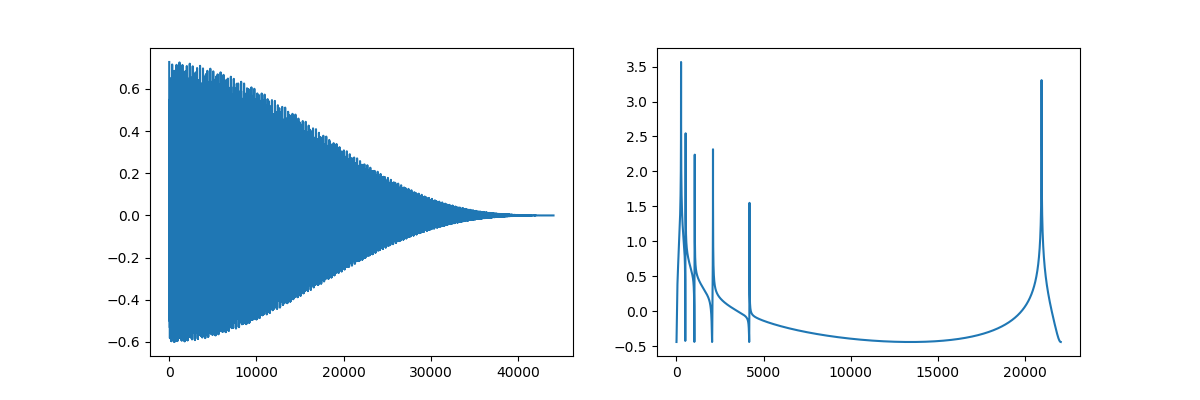

In [195]:
ti = np.arange(N)
%matplotlib notebook
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,2)
plt.plot(t[:N//2], np.log10(rd_fft[:N//2]))
plt.subplot(1,2,1)
plt.plot(ti, dat)

plt.show()

In [286]:
_x = [0,  0.05,0.1, 0.15, 0.2]
_y = [0.2,1,   0.8, 0.6, 0.5]
a = np.polyfit(_x,_y, 3)

In [287]:
x = np.linspace(0,1,200)
p = np.poly1d(a)
y = p(x)

<IPython.core.display.Javascript object>


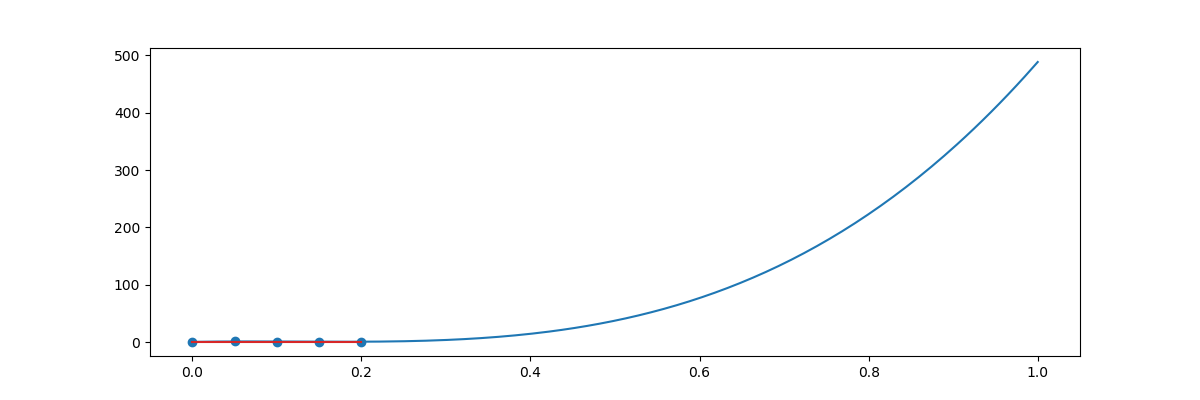

In [288]:
ti = np.arange(N)
%matplotlib notebook
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y)
plt.stem(_x,_y)
plt.show()